<a href="https://colab.research.google.com/github/Lakshay02020/Machine-Learning-Assignments/blob/main/A4_Kfold_MultiLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   **Lakshay Singla**
*   **102003371**
*   **3CO15**
* **Assignment 4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
df = df.rename(columns={'Avg. Area Income':'Income','Avg. Area Number of Bedrooms':'Bedrooms','Avg. Area House Age':'Age','Avg. Area Number of Rooms':'Rooms','Area Population':'Population'})

In [ ]:
df['Age'][0]

5.682861322

In [ ]:
# for i in range(len(df['Age'])):
#   if(df['Age'][i]<3):
#      df['Age'][i] = 5
#   elif(df['Age'][i]):
#      df['Age'][i] = 3
#   else:
#     df['Age'][i] = 1
# df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      5000 non-null   float64
 1   Age         5000 non-null   float64
 2   Rooms       5000 non-null   float64
 3   Bedrooms    5000 non-null   float64
 4   Population  5000 non-null   float64
 5   Price       5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


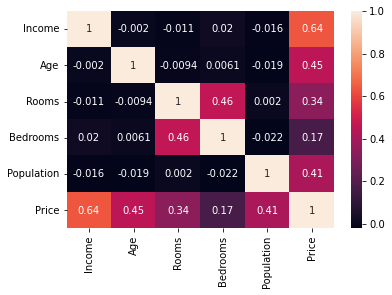

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
print("FEATURES\n",x)
print("OUTPUT\n",y)

FEATURES
            Income       Age     Rooms  Bedrooms   Population
0     79545.45857  5.682861  7.009188      4.09  23086.80050
1     79248.64245  6.002900  6.730821      3.09  40173.07217
2     61287.06718  5.865890  8.512727      5.13  36882.15940
3     63345.24005  7.188236  5.586729      3.26  34310.24283
4     59982.19723  5.040555  7.839388      4.23  26354.10947
...           ...       ...       ...       ...          ...
4995  60567.94414  7.830362  6.137356      3.46  22837.36103
4996  78491.27543  6.999135  6.576763      4.02  25616.11549
4997  63390.68689  7.250591  4.805081      2.13  33266.14549
4998  68001.33124  5.534388  7.130144      5.44  42625.62016
4999  65510.58180  5.992305  6.792336      4.07  46501.28380

[5000 rows x 5 columns]
OUTPUT
 0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.29895

In [ ]:
df.head()

,Income,Age,Rooms,Bedrooms,Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Income','Rooms','Bedrooms','Population']])
# df['Age'] = scaler.fit_transform(df[['Age']])
df['Income'] = scaler.fit_transform(df[['Income']])
df['Bedrooms'] = scaler.fit_transform(df[['Bedrooms']])
df['Rooms'] = scaler.fit_transform(df[['Rooms']])
df['Population'] = scaler.fit_transform(df[['Population']])

In [ ]:
df

,Income,Age,Rooms,Bedrooms,Population,Price
0,0.686822,5.682861,0.501502,0.464444,0.329942,1.059034e+06
1,0.683521,6.002900,0.464501,0.242222,0.575968,1.505891e+06
2,0.483737,5.865890,0.701350,0.695556,0.528582,1.058988e+06
3,0.506630,7.188236,0.312430,0.280000,0.491549,1.260617e+06
4,0.469223,5.040555,0.611851,0.495556,0.376988,6.309435e+05
...,...,...,...,...,...,...
4995,0.475738,7.830362,0.385619,0.324444,0.326351,1.060194e+06
4996,0.675097,6.999135,0.444024,0.448889,0.366362,1.482618e+06
4997,0.507135,7.250591,0.208534,0.028889,0.476515,1.030730e+06
4998,0.558419,5.534388,0.517579,0.764444,0.611282,1.198657e+06


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
train_y.shape

(3500,)

In [ ]:
train_x.shape

(3500, 5)

In [ ]:
A = train_x.T.dot(train_x)
B = np.linalg.inv(A)
C = B.dot(train_x.T)
D = C.dot(train_y)
print(D.shape)

(5,)


In [ ]:
D

array([1095505.03803204,   35879.63970854,  275355.73292687,
         39025.7946158 ,  507117.03437105])

In [ ]:
test_y

1501    1339096.077
2586    1251794.179
2653    1340094.966
1055    1431507.623
705     1042373.524
           ...     
3563    1348221.765
1538    1309937.399
1837    1472887.247
2380    1409762.119
1912    1009606.284
Name: Price, Length: 1500, dtype: float64

In [ ]:
y_pred = test_x.dot(D)
y_pred

1501    1.236182e+06
2586    1.187797e+06
2653    1.218000e+06
1055    1.220597e+06
705     1.286824e+06
            ...     
3563    1.307699e+06
1538    1.198718e+06
1837    1.297581e+06
2380    1.326615e+06
1912    1.152052e+06
Length: 1500, dtype: float64

In [ ]:
from sklearn import metrics

In [ ]:
np.sqrt(metrics.mean_squared_error(test_y,y_pred))
# metrics.mean_absolute_error(test_y,y_pred)
# metrics.r2_score(test_y,y_pred)

215684.08407857732

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


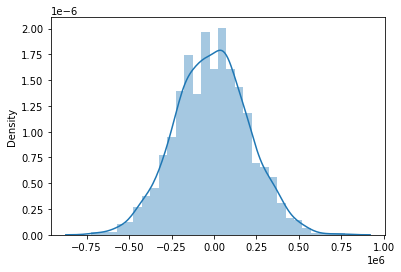

In [ ]:
sns.distplot((test_y-y_pred))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


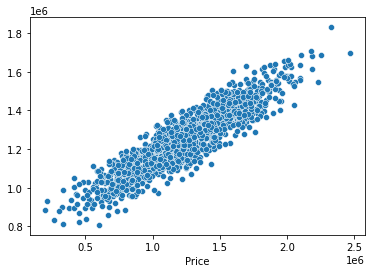

In [ ]:
sns.scatterplot(test_y,y_pred)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test_y,y_pred)

0.6058003868476052

***Question 2***

In [ ]:
df.columns

Index(['Income', 'Age', 'Rooms', 'Bedrooms', 'Population', 'Price'], dtype='object')

In [ ]:
B = np.zeros(6)
iteration = 1000
learning_rate = 0.01

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
train_x = train_x.reset_index(drop = True)
train_y = train_y.reset_index(drop = True)
test_x = test_x.reset_index(drop = True)
test_y = test_y.reset_index(drop = True)

In [ ]:
train_x.columns = [0,1,2,3,4]

In [ ]:
train_x

,0,1,2,3,4
0,0.416536,3.965745,0.760948,0.528889,0.624707
1,0.495066,6.490769,0.586327,0.264444,0.675228
2,0.662352,5.407515,0.665522,0.246667,0.382068
3,0.534447,6.385374,0.474246,0.262222,0.403774
4,0.573429,6.910415,0.671486,0.508889,0.527097
...,...,...,...,...,...
3495,0.649873,6.371627,0.279930,0.093333,0.431866
3496,0.432549,6.958045,0.567021,0.306667,0.621312
3497,0.538331,6.507971,0.448689,0.253333,0.534439
3498,0.454901,7.394768,0.801933,0.515556,0.716904


In [ ]:
train_x.loc[3499,0]

0.4823524000164084

In [ ]:
train_y

0       8.814461e+05
1       1.375771e+06
2       1.137069e+06
3       9.289500e+05
4       1.392084e+06
            ...     
3495    1.023944e+06
3496    1.223101e+06
3497    1.318598e+06
3498    1.708631e+06
3499    1.060898e+06
Name: Price, Length: 3500, dtype: float64

In [ ]:
n = len(train_x)

In [ ]:
beta=np.zeros(6)
number_of_iterations=50
learning_rate=0.01
for i in range(number_of_iterations):
    x0_gradient=0
    x1_gradient=0
    x2_gradient=0
    x3_gradient=0
    x4_gradient=0
    x5_gradient=0    
    for j in range(0,len(train_x)):
        # print("RUNNING",j)
        x1=train_x.loc[j][0]
        x2=train_x.loc[j][1]
        x3=train_x.loc[j][2]
        x4=train_x.loc[j][3]
        x5=train_y.loc[j] 
        x0_gradient+=(beta[0]+(beta[1]* x1)+(beta[2]*x2)+(beta[3]*x3)+(beta[4]*x4)-x5)
        x1_gradient+=((beta[0]+(beta[1]*x1)+(beta[2]*x2)+(beta[3]*x3)+(beta[4]*x4)-x5)*x1)
        x2_gradient+=((beta[0]+(beta[1]*x1)+(beta[2]*x2)+(beta[3]*x3)+(beta[4]*x4)-x5)*x2)
        x3_gradient+=((beta[0]+(beta[1]*x1)+(beta[2]*x2)+(beta[3]*x3)+(beta[4]*x4)-x5)*x3)
        x4_gradient+=((beta[0]+(beta[1]*x1)+(beta[2]*x2)+(beta[3]*x3)+(beta[4]*x4)-x5)*x4)
        x5_gradient+=((beta[0]+(beta[1]*x1)+(beta[2]*x2)+(beta[3]*x3)+(beta[4]*x4)-x5)*x5)

    beta[0]=beta[0]-learning_rate/n*x0_gradient
    beta[1]=beta[1]-learning_rate/n*x1_gradient
    beta[2]=beta[2]-learning_rate/n*x2_gradient
    beta[3]=beta[3]-learning_rate/n*x3_gradient
    beta[4]=beta[4]-learning_rate/n*x4_gradient
    beta[5]=beta[5]-learning_rate/n*x5_gradient
    print(beta)


[1.22821915e+04 7.21421978e+03 7.49719665e+04 6.28184099e+03
 5.59178545e+03 1.63599281e+10]
[1.98675291e+04 1.17732874e+04 1.21160339e+05 1.02219919e+04
 9.10702043e+03 2.68254337e+10]
[2.45577594e+04 1.46957216e+04 1.49606940e+05 1.27187174e+04
 1.13422213e+04 3.36576437e+10]
[2.74634528e+04 1.66093224e+04 1.67117790e+05 1.43256949e+04
 1.27883493e+04 3.82502838e+10]
[2.92691486e+04 1.79010568e+04 1.77888020e+05 1.53842030e+04
 1.37480259e+04 4.14624264e+10]
[3.03967870e+04 1.88094455e+04 1.84503448e+05 1.61046010e+04
 1.44077825e+04 4.38235913e+10]
[3.11064459e+04 1.94815093e+04 1.88557935e+05 1.66165513e+04
 1.48825945e+04 4.56601667e+10]
[3.15584334e+04 2.00078696e+04 1.91033912e+05 1.69999759e+04
 1.52433311e+04 4.71733336e+10]
[3.18515614e+04 2.04443843e+04 1.92536938e+05 1.73041376e+04
 1.55336753e+04 4.84870971e+10]
[3.20467357e+04 2.08254833e+04 1.93440268e+05 1.75594015e+04
 1.57805526e+04 4.96778923e+10]
[3.21814982e+04 2.11723887e+04 1.93973973e+05 1.77844840e+04
 1.600055

In [ ]:
test_x.insert(loc = 0,
          column = 'Extra',
          value = 1)

In [ ]:
test_x

In [ ]:
beta = [1.23e+06, 2.36167480e+05, 1.66809624e+05, 1.04642130e+05,
 2.01849346e+01, 1.4902858201e+05]


In [ ]:
output = test_x.dot(beta)
output[1]

In [ ]:
test_y[1]

In [ ]:
from sklearn import metrics
print(metrics.r2_score(output,test_y))

**Submitted by Lakshay Singla**